In [1]:
import pandas as pd 
import numpy as np 

df=pd.read_csv('mnist_train.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df.shape

(60000, 785)

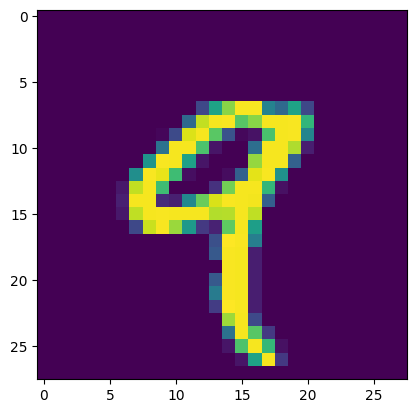

In [3]:
#let's see a image 

import matplotlib.pyplot as plt 


plt.imshow(df.iloc[4,1:].values.reshape(28,28))   #since 28 by 28 pixels

# 1st Train a model i.e before PCA check accuracy 

In [4]:
x=df.iloc[:,1:]
y=df.iloc[:,0]


In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.25,random_state=42)


In [6]:
X_train.shape

(45000, 784)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn=KNeighborsClassifier()

knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [9]:
import time 
start=time.time()

y_pred=knn.predict(X_test)

print(time.time()-start)  #how much time knn taken to train this dataset 

25.30536675453186


In [10]:
from sklearn.metrics import accuracy_score 

accuracy_score(y_test,y_pred)

0.9694

# Now we will apply PCA 

In [11]:
#Step -1: Standararization 

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)

X_test_scaled=scaler.transform(X_test)


# REST OF STEPS ARE HERE 

In [12]:
from sklearn.decomposition import PCA 

pca=PCA(n_components=100)   #how many eigen vector we want to take? here assign the value 

X_train_trf=pca.fit_transform(X_train_scaled)
X_test_trf= pca.transform(X_test_scaled)


In [13]:
X_train.shape

(45000, 784)

In [14]:
X_test.shape

(15000, 784)

In [15]:
knn.fit(X_train_trf,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [16]:
y_pred = knn.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.9578666666666666

# we can run a loop to get the optimized value for eigenvectors in terms of accuracy

In [18]:
for i in range(1,785,20): 
    
    pca=PCA(n_components=i)  
    X_train_trf=pca.fit_transform(X_train_scaled)
    X_test_trf= pca.transform(X_test_scaled)
    knn=KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred = knn.predict(X_test_trf)

    print(accuracy_score(y_test,y_pred))

0.2547333333333333
0.9474
0.9570666666666666
0.9586666666666667
0.9583333333333334
0.9572666666666667
0.9575333333333333
0.9554
0.9552666666666667
0.9535333333333333
0.9536666666666667
0.9522666666666667
0.9498666666666666
0.9494
0.9483333333333334
0.9477333333333333
0.9464
0.9458666666666666
0.9457333333333333
0.9458666666666666
0.9455333333333333
0.9449333333333333
0.945
0.9448666666666666
0.9444666666666667
0.9445333333333333
0.9444
0.9444
0.9440666666666667
0.944
0.9441333333333334
0.9439333333333333
0.9437333333333333
0.9440666666666667
0.9438
0.9436
0.9436
0.9436
0.9436
0.9436


# now we will use pca to plot this 784 dimensional data in 2D and 3D space

# 2D

In [19]:
pca2=PCA(n_components=2)
X_train_2D=pca2.fit_transform(X_train_scaled)
X_test_2D= pca2.transform(X_test_scaled) 


In [21]:
X_train_2D.shape

(45000, 2)

In [22]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "browser"


y_train_2D=y_train.astype(str) 
fig=px.scatter(x=X_train_2D[:,0],
               y=X_train_2D[:,1],
               color=y_train_2D,
               color_discrete_sequence=px.colors.qualitative.G10
              )
fig.show()

# 3D 

In [23]:


pca3=PCA(n_components=3)

X_train_3D=pca3.fit_transform(X_train_scaled)
X_test_3D= pca3.transform(X_test_scaled) 

In [24]:
X_train_3D.shape

(45000, 3)

In [28]:

y_train_3D=y_train.astype(str) 
fig=px.scatter_3d(x=X_train_3D[:,0],
               y=X_train_3D[:,1],
               z=X_train_3D[:,2],
               color=y_train_3D,
               color_discrete_sequence=px.colors.qualitative.G10
              )
fig.update_layout( margin=dict(l=20,r=10,t=20,b=20))
fig.show()

# some important values of PCA 

In [29]:
pca3.explained_variance_    #it represents eigen values 

array([40.57697373, 29.33877711, 26.77613595])

In [31]:
pca3.components_   # represents the eigen vectors


array([[-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [32]:
pca3.components_.shape

(3, 784)

In [36]:
pca3.explained_variance_ratio_ #total coverage must be more than 95%



array([0.05706902, 0.04126319, 0.03765899])

In [37]:
pca3.explained_variance_ratio_.sum()  #here covering 13%

0.1359911928056707

# Finding the optimum number (how many eigen values we have to take) 


In [38]:
pca=PCA(n_components=None) #we are taking all 784 

X_train_trfall=pca.fit_transform(X_train_scaled)
X_test_trfall= pca.transform(X_test_scaled) 


In [41]:
pca.explained_variance_ratio_.shape

(784,)

In [42]:
pca.components_.shape    # 784Dimensional 

(784, 784)

In [44]:
cumusum = np.cumsum(pca.explained_variance_ratio_)
cumusum

array([0.05706902, 0.0983322 , 0.13599119, 0.16512663, 0.19049054,
       0.21258193, 0.23204106, 0.24969277, 0.26522939, 0.27937621,
       0.29288259, 0.3050622 , 0.316329  , 0.32740339, 0.33777272,
       0.34783633, 0.35737865, 0.36663296, 0.37562237, 0.38441414,
       0.39285955, 0.40100049, 0.40870357, 0.41619595, 0.42341865,
       0.43038851, 0.4372708 , 0.44394202, 0.45028839, 0.45647146,
       0.46254453, 0.46847352, 0.47420078, 0.4799083 , 0.48553096,
       0.49093136, 0.49628887, 0.50152836, 0.50668529, 0.51153414,
       0.51634616, 0.52111715, 0.52573299, 0.53027717, 0.53477452,
       0.53920181, 0.54358671, 0.5479536 , 0.55227477, 0.55643038,
       0.56055247, 0.5646355 , 0.56863802, 0.572618  , 0.57653509,
       0.58040294, 0.58417421, 0.58786143, 0.5914946 , 0.59510856,
       0.59866375, 0.60217638, 0.60561716, 0.60904673, 0.6124716 ,
       0.61583539, 0.61915195, 0.62243265, 0.62569513, 0.62889264,
       0.63204631, 0.6351679 , 0.63827931, 0.64137134, 0.64441

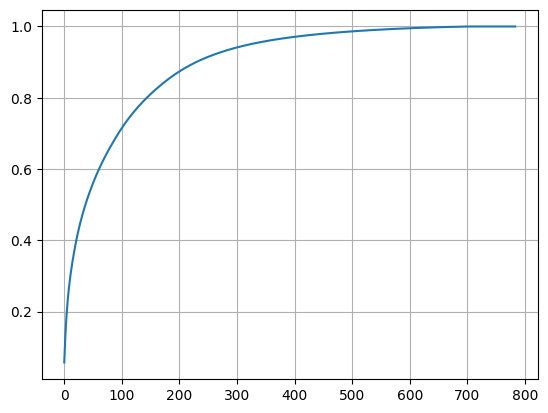

In [46]:
plt.plot(cumusum)
plt.grid()

# from the graph we are seeing that 1st 300 components are enough to train the model